# CoV vs HD Classification

In [4]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

## load results

In [5]:
path = "/home/jovyan/shared/mahdi/1_projects/model_optimization/02classification/results/*.csv"
files = glob.glob(path)
len(files)

15

In [6]:
dataset_map = {
    'full': 'F',
    'half': 'H',
    'quarter': 'Q'
}
def combine_stats(list_of_paths):
    # read all results files and combine
    df = pd.concat([pd.read_csv(path) for path in list_of_paths]).reset_index(drop=True)

    df['dataset'] = df['model'].str.split('_').str[2].map(dataset_map)
    df['model_size'] = df['model'].str.split('_').str[1].str.replace('M', '').astype(int)

    # get means and errors
    means = df.groupby(["model_size", "dataset"]).mean(numeric_only=True)
    sem = df.groupby(["model_size", "dataset"]).sem(numeric_only=True)

    # combine in a readable table format
    combined = means.copy()
    for i in means.index:
        for j in [col for col in means.columns if "test" in col]:
            combined.loc[i,j] = f"{str(round(means.loc[i,j], 4))} (\xB1 {str(round(sem.loc[i,j], 4))})"

    return df, combined

In [7]:
full_df, summary = combine_stats(files)

## summary of Dataset-F results

In [8]:
summary.xs("F", level="dataset")

,itr,test_loss,test_accuracy,test_precision,test_recall,test_f1,test_auc,test_aupr,test_mcc
model_size,,,,,,,,,
8,2.0,0.6037 (± 0.0017),0.6762 (± 0.0037),0.6544 (± 0.0035),0.7468 (± 0.0042),0.6975 (± 0.0034),0.7424 (± 0.0029),0.7334 (± 0.0035),0.356 (± 0.0074)
35,2.0,0.5913 (± 0.0014),0.6877 (± 0.0026),0.6745 (± 0.0026),0.7259 (± 0.0053),0.6992 (± 0.0029),0.7542 (± 0.0024),0.7495 (± 0.0026),0.3766 (± 0.0052)
150,2.0,0.5788 (± 0.0009),0.7 (± 0.0014),0.687 (± 0.0012),0.7346 (± 0.0044),0.71 (± 0.002),0.768 (± 0.0013),0.7668 (± 0.002),0.401 (± 0.0028)
350,2.0,0.559 (± 0.002),0.7152 (± 0.0026),0.7194 (± 0.0026),0.706 (± 0.01),0.7124 (± 0.0045),0.7858 (± 0.0019),0.7877 (± 0.0022),0.4307 (± 0.005)
650,2.0,0.5643 (± 0.0013),0.7089 (± 0.0013),0.6993 (± 0.0036),0.7336 (± 0.0096),0.7158 (± 0.003),0.7814 (± 0.0013),0.7858 (± 0.0022),0.4186 (± 0.0026)


## plot HD vs CoV accuracy

In [9]:
# order x axis
xticks = [8, 35, 150, 350, 650]
full_df["model_size"] = pd.Categorical(
    full_df["model_size"], categories=xticks, ordered=True
)

In [10]:
# order for legend
data_order = dataset_map.values()
full_df["dataset"] = pd.Categorical(
    full_df["dataset"], categories=data_order, ordered=True
)

In [11]:
pallete = sns.color_palette("colorblind", n_colors=3)
palette_dict = {
    'F': pallete[0],
    'H': pallete[1],
    'Q': pallete[2]
}

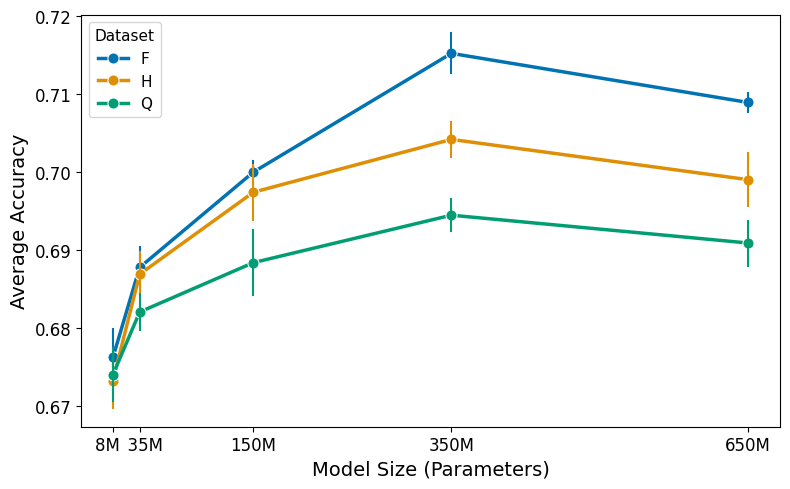

In [ ]:
plt.figure(figsize=[8,5])

sns.lineplot(
    data=full_df, 
    x="model_size", 
    y="test_accuracy", 
    hue="dataset", 
    palette=palette_dict, 
    markers=True, 
    lw=2.5, 
    marker="o", 
    ms=8,
    errorbar="se",
    err_style="bars",
)

ax = plt.gca()

xtick_labels = ["8M  ", "  35M", "150M", "350M", "650M"]
ax.set_xticks(xticks, xtick_labels)
ax.tick_params(axis="both", labelsize="12")

ax.set_xlabel("Model Size (Parameters)", fontsize=14)
ax.set_ylabel("Average Accuracy", fontsize=14)

plt.legend(fontsize=11, title="Dataset", title_fontsize=11, loc='upper left')

# save
plt.tight_layout()
plt.savefig("./binary-classification_accuracy.pdf", bbox_inches='tight', dpi=300)